## Feature Engineering
- Feature Engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge. (Simple)
- Feature engineering is a crucial step in the machine learning pipeline where you create new features or modify existing ones to improve the performance of your model. 
- The goal is to extract relevant information from the raw data and present it in a way that enhances the model's ability to make accurate predictions

## Approach
#### These steps outline the process to be followed when working on a predictive model: 
- Problem Definition
- Data Collection
- Data Preprocessing
- Feature Selection/Engineering
- Data Splitting
- Model Selection
- Model Training
- Prediction
- Hyperparameter Tuning
- Model Evaluation



## Problem Definition

### *Clearly state the problem you want to solve, as well as the outcome you want to predict.*


Here we have to find outliers and remove it.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Collection

### *Gather relevant data that will be used to train and test the prediction model.*


In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Data Preprocessing


### *Clean the data by handling missing values, dealing with outliers, data visualization, normalizing features, and encoding categorical variables.*


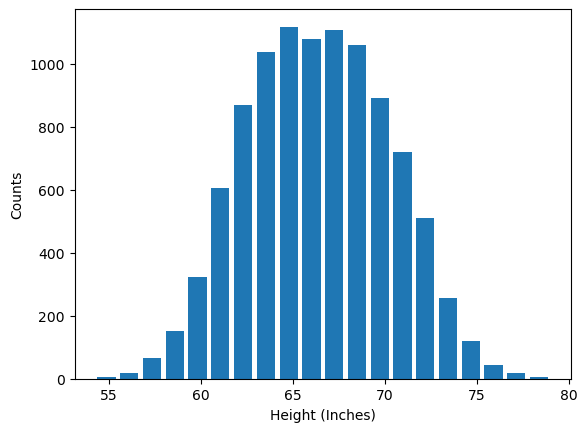

In [7]:
plt.hist(df['Height'], bins = 20, rwidth= 0.8)
plt.xlabel("Height (Inches)")
plt.ylabel("Counts")
plt.show()

In [11]:
df.Height.min()

54.2631333250971

In [12]:
df.Height.max()

78.9987423463896

In [13]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [14]:
df.Height.mean()

66.36755975482106

In [15]:
df.Height.std()

3.8475281207732324

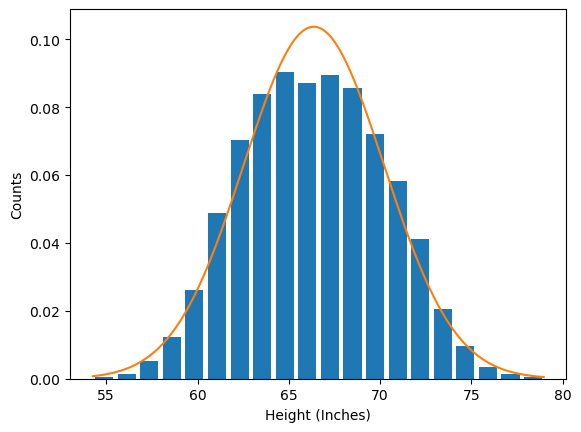

In [23]:
from scipy.stats import norm
import numpy as np

plt.hist(df['Height'], bins = 20, rwidth= 0.8, density= True)
plt.xlabel("Height (Inches)")
plt.ylabel("Counts")

rang = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rang, norm.pdf(rang, df.Height.mean() , df.Height.std()))

### Remove outlier using 3 Standard deviation

In [25]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

In [26]:
lower_limit = df.Height.mean() -3*df.Height.std()
lower_limit

54.82497539250136

In [28]:
# Remove outliers
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [29]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [30]:
df_no_outlier_std_dev.shape

(9993, 3)

##  Outlier detection and removal using Z Score

### Z score indicates how many standard deviation away a data point is.

### For example in our case mean is 66.37 and standard deviation is 3.84.

### If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [31]:
66.37 + 3 * 3.84

77.89

## Data_point(X) = Mean + Z* Standard_Deviation

In [32]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [33]:
(73.84-66.37)/3.84

1.9453124999999998

In [36]:
# Outliers
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [37]:
# Remove the outliers

df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [38]:
df_no_outliers.shape

(9993, 4)

In [40]:
df.shape

(10000, 4)